# Next time: try and remove 'nan' stars from consideration, or add the nice ones to a new array
### Might need to move the 'attitude detection' section in front of aperture photometry cell, so just don't do ap photom on the bad ones?
# Also calculate apparent mag of a star? (see Luke's thing)

# Attempting some basic aperture photometry (yeet)

Based on method used in previous source detection test

First up, dependencies:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from matplotlib.colors import LogNorm
#from astropy.visualization import SqrtStretch
#from astropy.visualization.mpl_normalize import ImageNormalize

Importing .fits file and extracting the ~ *data* ~:

In [3]:
image_file = 'example_data/PAL5_3p6um.fits'
data = fits.getdata(image_file, ext=0)
#print(image_data.shape)

hdu_list = fits.open(image_file)
hdr = hdu_list[0].header
#data = hdu_list[0].data   # could open data here instead of fits.getdata above, more consistent
gain = hdr['GAIN']         # don't need gain any more
exptime = hdr['EXPTIME']
fluxconv = hdr['FLUXCONV']
print(gain, exptime, fluxconv)
hdu_list.close()

3.71 969.101928711 0.1469


Locating the objects in the image using DAOStarFinder, and plotting no. of stars detected vs. sigma curve:

In [4]:
#def detect_sources(data, sigma_level, FWHM):
#    daofind = DAOStarFinder(threshold = sigma_level * std, fwhm=FWHM)
#    sources = daofind(data - median)
#    return sources

In [5]:
mean, median, std = sigma_clipped_stats(data, sigma=3.) # don't need mean any more?

#detect_sources(data, sigma_level=5., FWHM=3.)
#for col in sources.colnames:
#    sources[col].info.format = '%.8g'
#print(sources)

#for i in range(1, 8):
#    detect_sources(data, sigma_level=float(i), FWHM=3.)
#    print(len(sources))

no_detected = []
sigma_vals = []
 
#for i in np.arange(1., 15.5, 0.5):
#    #print(i)
#    daofind = DAOStarFinder(threshold = i * std, fwhm = 3.)
#    sources = daofind(data - median)
#    #print(len(sources))
#    
#    no_detected.append(len(sources))
#    sigma_vals.append(i)
#
#print(no_detected)
#print(sigma_vals)

In [6]:
#plt.plot(sigma_vals, no_detected)
#plt.xlabel('sigma')
#plt.ylabel('number of sources detected')
#plt.grid(True)
#plt.savefig('images/sigma_curve_01.png', dpi=100)

Adding the centroid positions of the objects to an array and fitting circular apertures and annuli around them:

C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


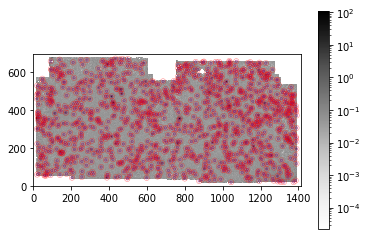

In [17]:
daofind = DAOStarFinder(threshold = 4. * std, fwhm = 3.)  # 4 sigma seems ideal to me
sources = daofind(data - median)

pos = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(pos, r=6.)
annuli = CircularAnnulus(pos, r_in=6., r_out=14.)
all_apers = [apertures, annuli]
norm = LogNorm()
plt.imshow(data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.colorbar()
apertures.plot(color='blue', lw=.5, alpha=.5)
annuli.plot(color='red', lw=.5, alpha=.5)

#plt.title('4 sigma')
#plt.savefig('images/sigma_4.png', dpi=500)

Performing some basic aperture photometry, summing the pixel brightness values (fluxes?) inside each aperture and annulus:

(Note: 'nan' values for apertures could be where the objects are too close to the edge of the image and use some pure white in their summation, and those for the annuli might be where annuli overlap?)

In [8]:
phot_table = aperture_photometry(data, all_apers)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)

 id   xcenter   ycenter  aperture_sum_0 aperture_sum_1
        pix       pix                                 
---- --------- --------- -------------- --------------
   1 1044.0413 20.067713            nan            nan
   2 1323.0952 20.744526            nan            nan
   3  1374.715  21.00836            nan            nan
   4 1306.2872 21.691519            nan            nan
   5  1290.679 24.203295            nan            nan
   6 1193.3978 26.582374      6.0891613            nan
   7  875.5912 26.690492            nan            nan
   8 1269.2458 28.561558      14.020742            nan
   9 1385.5122 28.729845      12.051177            nan
  10 929.15178 29.723225       5.669843            nan
 ...       ...       ...            ...            ...
1215 370.50076 660.02253      9.8059429      27.379714
1216 409.61314 662.66578      9.2552474      34.777863
1217 250.44155 664.54819      6.9880182      21.122357
1218 282.76805 665.27772      7.6697902      22.254035
1219 419.7

Finding which star coordinates are giving me attitude and plotting them:

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 23, 24, 25, 26, 27, 29, 32, 34, 41, 44, 46, 49, 53, 55, 59, 61, 66, 123, 142, 150, 245, 280, 302, 346, 372, 404, 414, 447, 482, 485, 491, 495, 568, 596, 616, 633, 643, 649, 674, 681, 692, 701, 727, 748, 772, 850, 892, 898, 907, 979, 989, 998, 1021, 1026, 1029, 1030, 1031, 1033, 1048, 1054, 1072, 1091, 1094, 1125, 1133, 1135, 1143, 1147, 1152, 1156, 1158, 1173, 1192, 1194, 1195, 1200, 1202, 1204, 1205, 1206, 1207, 1208, 1209, 1211, 1212, 1213, 1214, 1220, 1221, 1222, 1223, 1224]


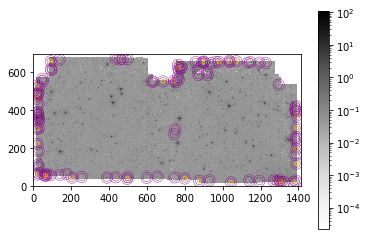

In [11]:
fail_test_x_ap = []
fail_test_y_ap = []
fail_test_x_an = []
fail_test_y_an = []
nice_data = []

for i in range(0, len(phot_table)):
    if np.isnan(phot_table['aperture_sum_0'][i]) == True:
        fail_test_x_ap.append(phot_table['xcenter'][i].value)
        fail_test_y_ap.append(phot_table['ycenter'][i].value)
    if np.isnan(phot_table['aperture_sum_1'][i]) == True:
        fail_test_x_an.append(phot_table['xcenter'][i].value)
        fail_test_y_an.append(phot_table['ycenter'][i].value)
    else:
        nice_data.append(phot_table[:][i])

fail_test_all_ap = np.column_stack((fail_test_x_ap, fail_test_y_ap))
fail_test_all_an = np.column_stack((fail_test_x_an, fail_test_y_an))
aperture_fails = CircularAperture(fail_test_all_ap, r=10.)
annulus_fails = CircularAnnulus(fail_test_all_an, r_in=20., r_out=30.)
#print(len(aperture_fails), len(annulus_fails))

#print(fail_test_all_ap)
#print(fail_test_all_an)
#rint(nice_data)

plt.imshow(data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.colorbar()
aperture_fails.plot(color='orange', lw=.7, alpha=1.)
annulus_fails.plot(color='purple', lw=.4, alpha=1.)

#plt.savefig('images/ap_photom_fail_stars_04.png', dpi=500)

Estimating the local background in the annuli by finding the mean brightness within:

In [10]:
bkg_mean = nice_data['aperture_sum_1'] / annuli.area
bkg_sum = bkg_mean * apertures.area
final_sum = nice_data['aperture_sum_0'] - bkg_sum

nice_data['residual_sum_mean'] = final_sum
for col in nice_data.colnames:
    nice_data[col].info.format = '%.8g'
print(nice_data)

TypeError: list indices must be integers or slices, not str

Alternate method: better stats yay (sigma-clipped median in the annuli):

In [ ]:
annulus_masks = annuli.to_mask(method='center') # note: exact would be overkill for local bkg estimation (read ap phot tutorial for explanation)

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)

bkg_median = np.array(bkg_median)
phot = aperture_photometry(data, apertures)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * apertures.area
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']

for col in phot.colnames:
    phot[col].info.format = '%.8g'
print(phot)

In [ ]:
f = open('file.txt', 'wb')
for col in phot.colnames:
    f.write(phot[col])